# seaborn版数据可视化作业

## 准备

In [1]:
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [2]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


#### Answer-1

Text(0, 0.5, 'number')

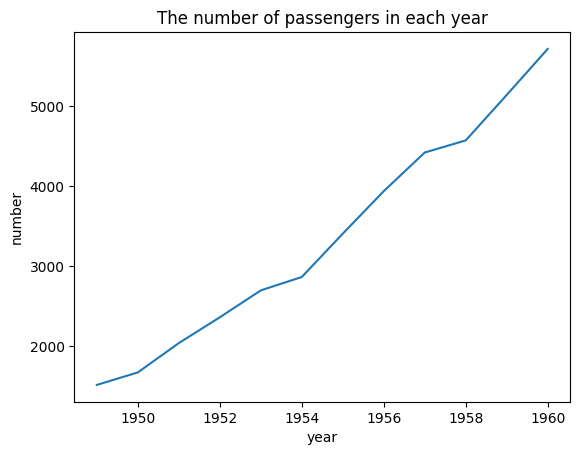

In [3]:
df = data[['year', 'passengers']].groupby(['year']).sum().reset_index() # 取出有用的两列，按照年份分组然后求每年的乘客总数

sns.lineplot(x='year', y='passengers', data=df)
plt.title('The number of passengers in each year')   # 标题
plt.xlabel('year')                                   # x label
plt.ylabel('number')                                 # y label


#### Answer-2

Text(0, 0.5, 'number')

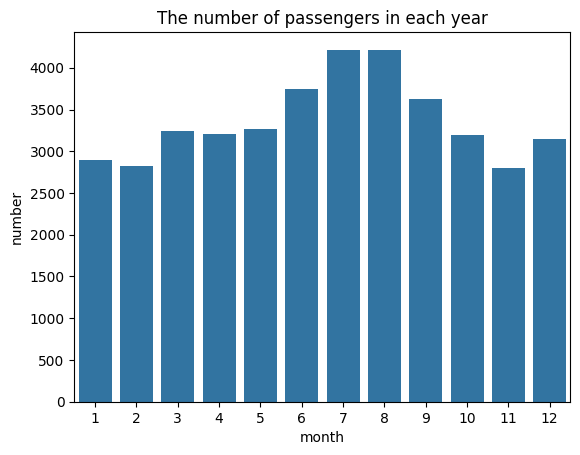

In [4]:
df = data[['month', 'passengers']].groupby(['month'], observed=False).sum().reset_index() # 取出有用的两列，按照月份分组然后求每年的乘客总数
x_data = ['1','2','3','4','5','6','7','8','9','10','11','12']         # X轴数据

sns.barplot(x=x_data, y='passengers', data=df).set_title("The number of passengers in each month")
plt.title('The number of passengers in each year')   # 标题
plt.xlabel('month')                                   # x label
plt.ylabel('number')                                 # y label

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [34]:
data = sns.load_dataset("iris")
data.head() # 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Answer-1

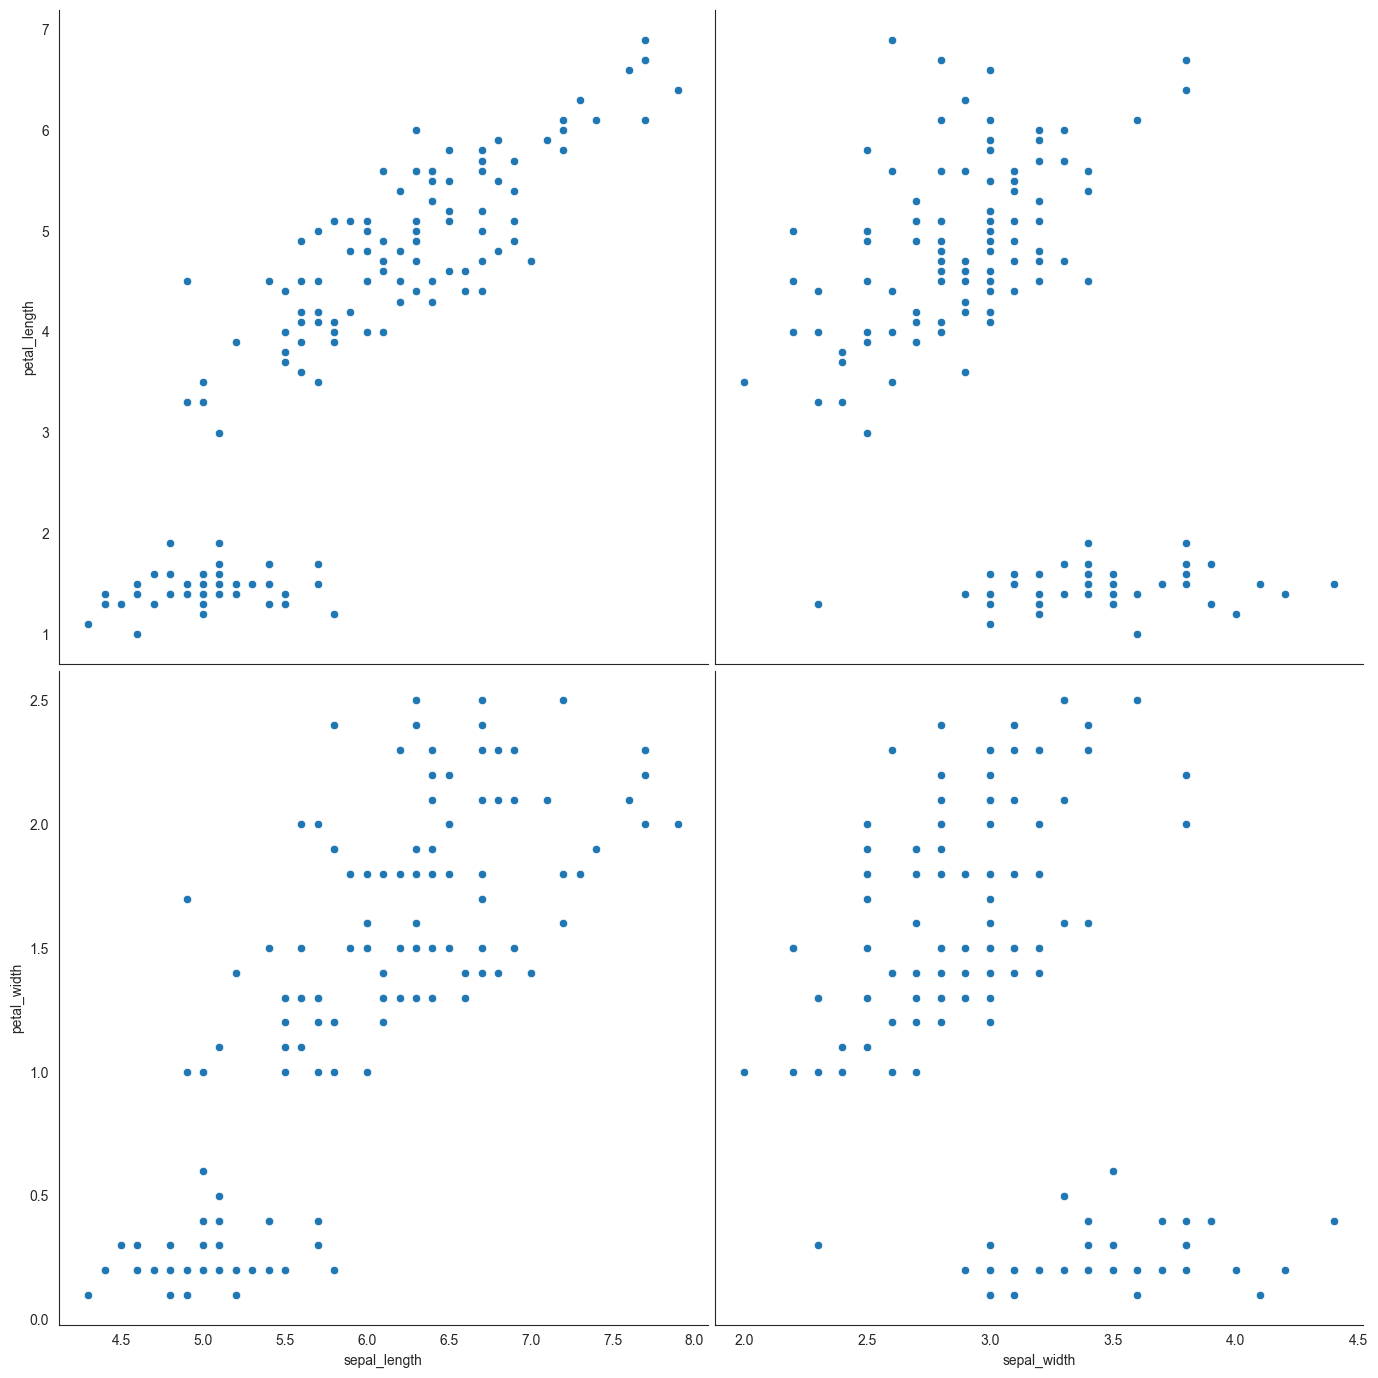

In [6]:
sns.set_style('white')
sns.pairplot(data, x_vars=["sepal_length", "sepal_width"], y_vars=["petal_length", "petal_width"], height=7)    
# so.Plot(ds).pair(x=["sepal_length", "sepal_width"], y=["petal_length", "petal_width"]).add(so.Dot())

#### Answer-2     

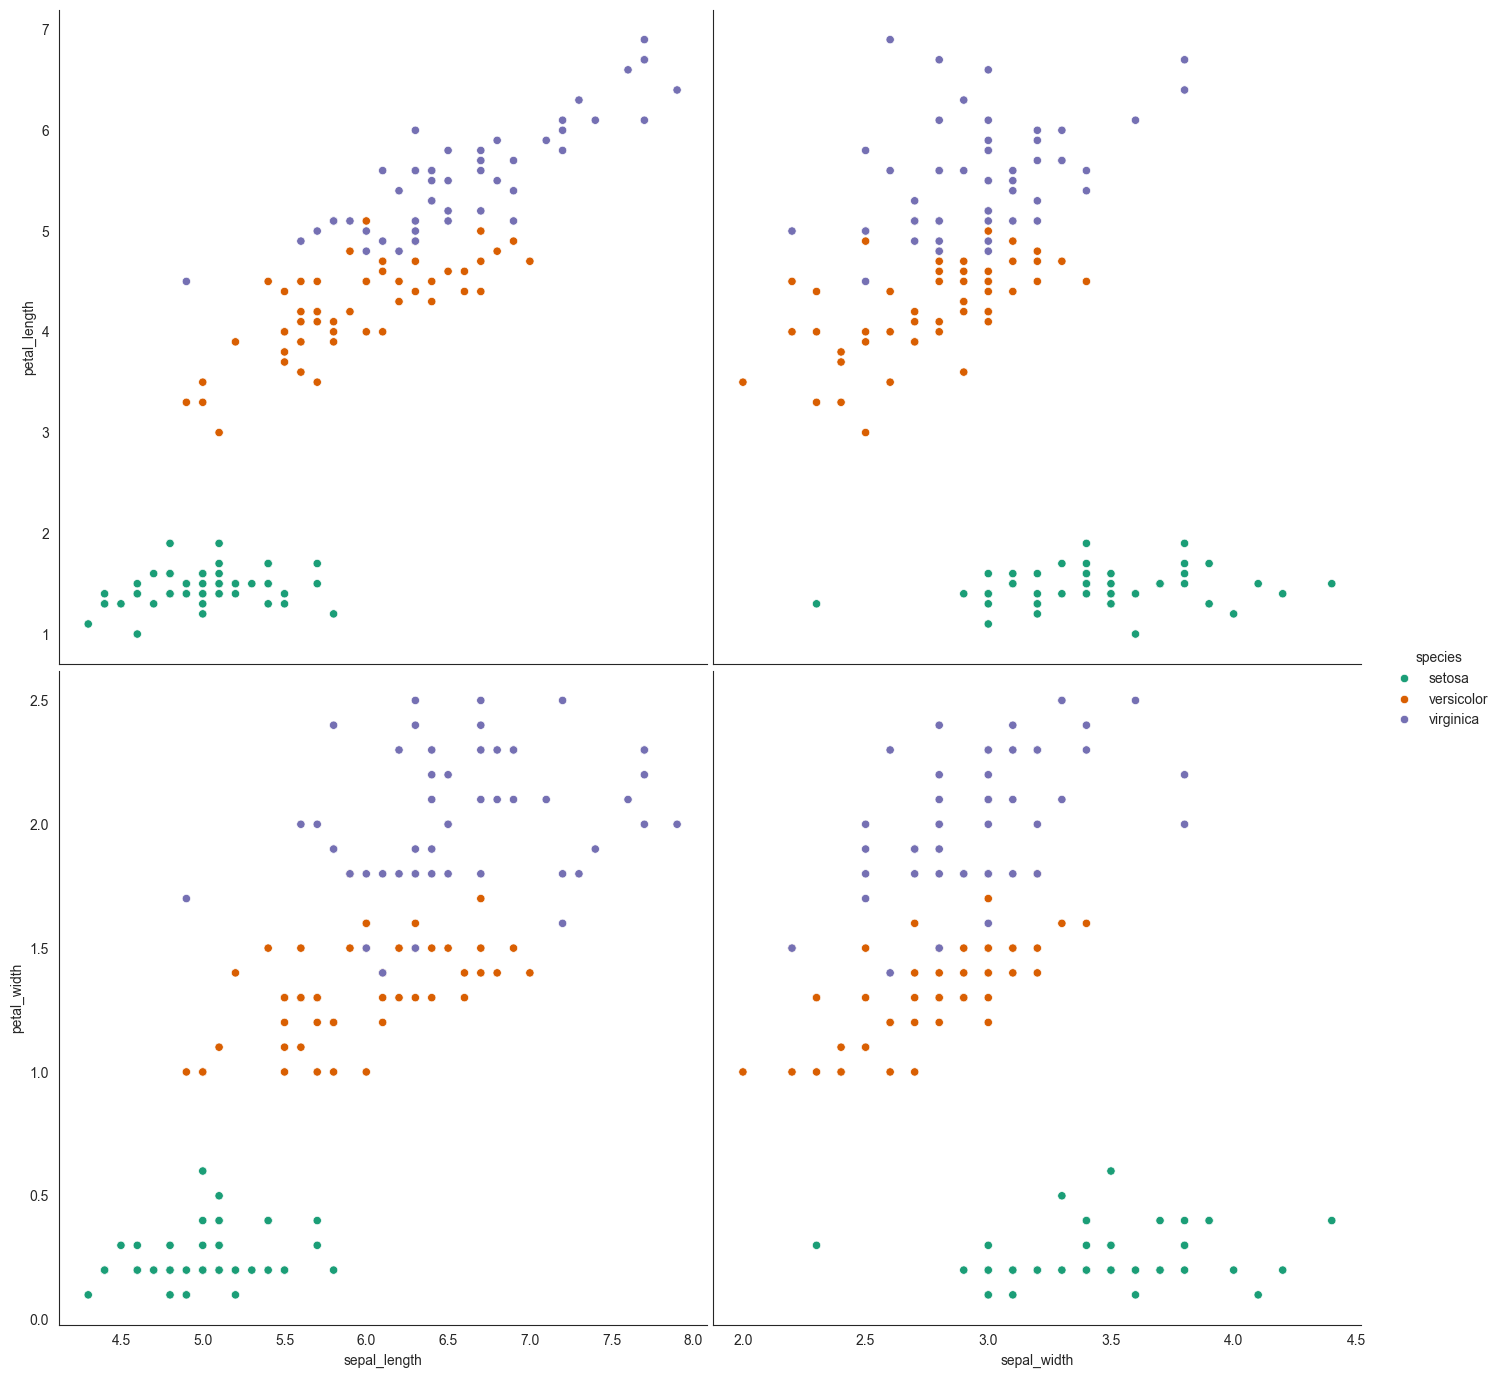

In [7]:
sns.set_style('white')  # 设置画布颜色
# 将不同种类的数据用不同的颜色区分
sns.pairplot(data, x_vars=["sepal_length", "sepal_width"], y_vars=["petal_length", "petal_width"], height=7, hue='species', palette='Dark2') 

In [ ]:
# data.to_excel('output.xlsx', index=False)
# df = pd.read_excel('size.xlsx')
# df.head()

In [ ]:
# df = data[["sepal_length", "petal_length", "species"]].groupby(["species"])# .reset_index()

# df_setosa = data.loc[data["species"].str.contains('setosa')]
# setosa_sepal_size = df_setosa["sepal_length"] * df_setosa["sepal_width"]
# setosa_petal_size = df_setosa["petal_length"] * df_setosa["petal_width"]

# df_versicolor = data.loc[data["species"].str.contains('versicolor')]
# versicolor_sepal_size = df_versicolor["sepal_length"] * df_versicolor["sepal_width"]
# versicolor_petal_size = df_versicolor["petal_length"] * df_versicolor["petal_width"]

# df_virginica = data.loc[data["species"].str.contains('virginica')]
# virginica_sepal_size = df_virginica["sepal_length"] * df_virginica["sepal_width"]
# virginica_petal_size = df_virginica["petal_length"] * df_virginica["petal_width"]

# size_data1 = {'sepal_size':setosa_sepal_size}

In [ ]:
# sns.boxplot(df, x="sepal_size", y="petal_size", hue="species")

#### Answer-3

Text(0.5, 1.0, 'The box with 4 features for the setosa flowers')

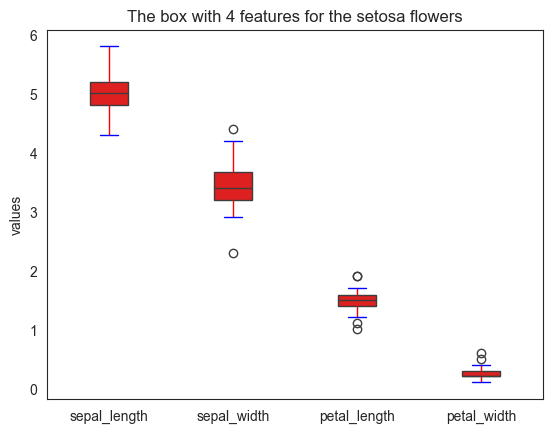

In [35]:
# 先将data按种类不同拆分成三个不同的DataFrame
df_setosa = data.loc[data["species"].str.contains('setosa')]               
df_versicolor = data.loc[data["species"].str.contains('versicolor')]
df_virginica = data.loc[data["species"].str.contains('virginica')]

# 关于setosa的数据绘图
sns.boxplot(df_setosa.iloc[:, 0:4], width=0.3, color='r', whiskerprops={'color':'red'}, capprops={'color': 'b'},) 
plt.ylabel('values')
plt.title('The box with 4 features for the setosa flowers')

Text(0.5, 1.0, 'The box with 4 features for the versicolor flowers')

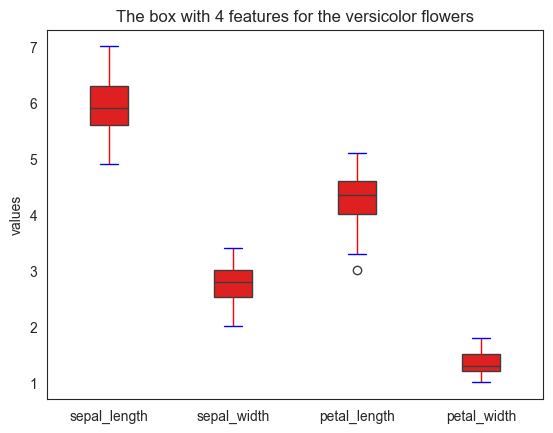

In [36]:
# 关于versicolor的数据绘图
sns.boxplot(df_versicolor.iloc[:, 0:4], width=0.3, color='r',whiskerprops={'color':'red'}, capprops={'color': 'b'},)
plt.ylabel('values')
plt.title('The box with 4 features for the versicolor flowers')

Text(0.5, 1.0, 'The box with 4 features for the virginica flowers')

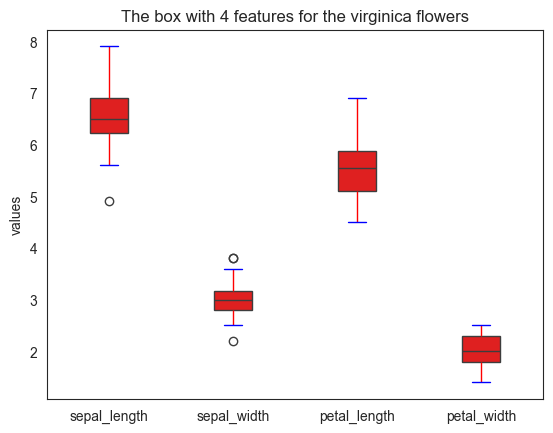

In [37]:
# 关于virginica数据绘图
sns.boxplot(df_virginica.iloc[:, 0:4], width=0.3, color='r', whiskerprops={'color':'red'}, capprops={'color': 'b'},)
plt.ylabel('values')
plt.title('The box with 4 features for the virginica flowers')

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [38]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Answer-1

Text(0.5, 1.0, 'total bill VS tip')

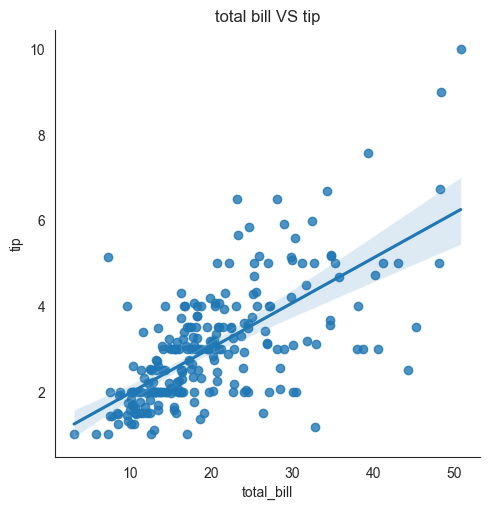

In [20]:
sns.lmplot(data, x="total_bill", y="tip")

plt.title('total bill VS tip')

### Answer-2

Text(0.5, 1.0, 'The violin with 2 features for the tip')

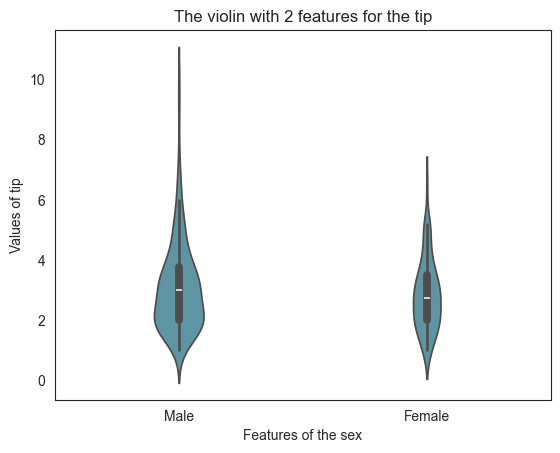

In [24]:
sns.violinplot(data, x='sex', y='tip',density_norm='count', common_norm=False, width=0.2, color='#539caf')

plt.xlabel('Features of the sex')
plt.ylabel('Values of tip')
plt.title('The violin with 2 features for the tip')

### Answer-3

Text(0.5, 1.0, 'The violin with 2 features for the tip')

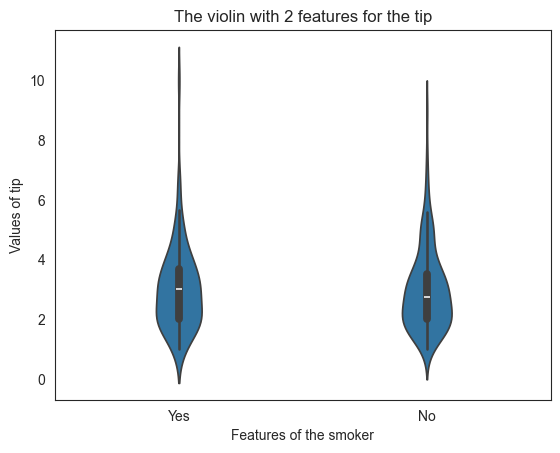

In [23]:
sns.violinplot(data, x='smoker', y='tip', width=0.2)

plt.xlabel('Features of the smoker')
plt.ylabel('Values of tip')
plt.title('The violin with 2 features for the tip')

### Answer-4

Text(0.5, 1.0, 'The violin with 4 features for the tip')

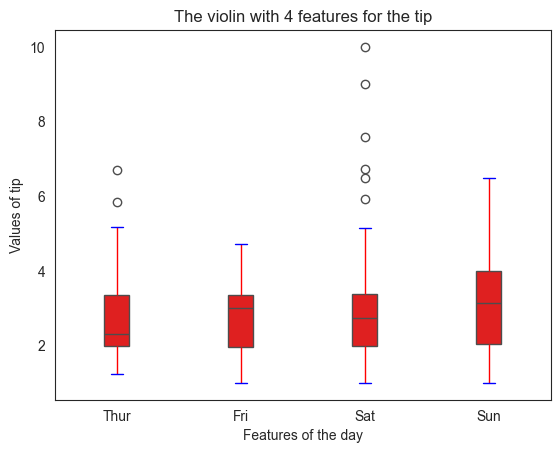

In [32]:
sns.boxplot(data, x='day', y='tip', 
            width=0.2, 
            patch_artist = True,
            color='r',
            capprops={'color': 'b'},
            whiskerprops={'color':'r'}
           )

plt.xlabel('Features of the day')
plt.ylabel('Values of tip')
plt.title('The violin with 4 features for the tip')

### Answer-5

Text(0.5, 1.0, 'The violin with 2 features for the tip')

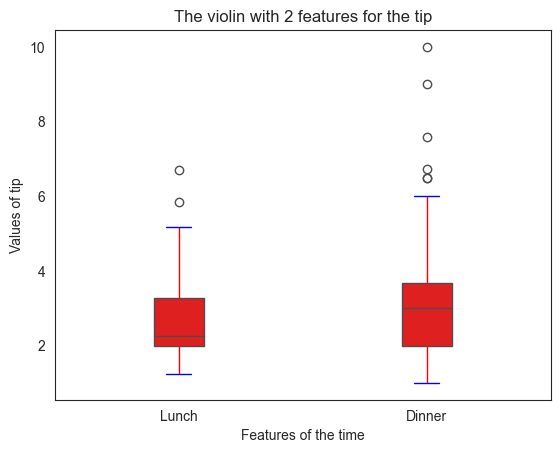

In [40]:
sns.boxplot(data, x='time', y='tip', 
            width=0.2, 
            patch_artist = True,
            color='r',
            capprops={'color': 'b'},
            whiskerprops={'color':'r'}
           )

plt.xlabel('Features of the time')
plt.ylabel('Values of tip')
plt.title('The violin with 2 features for the tip')

### Answer-6

Text(0.5, 1.0, 'The violin with 6 features for the tip')

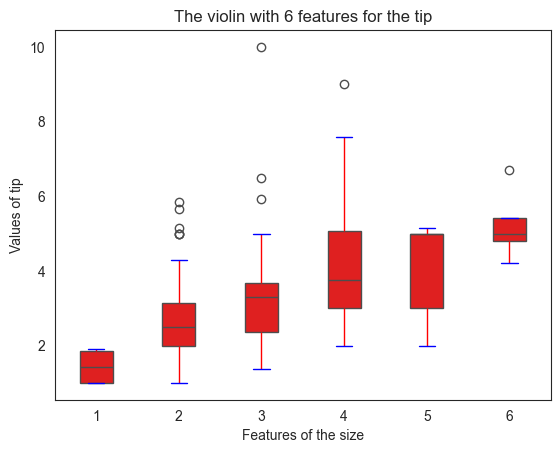

In [46]:
sns.boxplot(data, x='size', y='tip', 
            width=0.4, 
            patch_artist = True,
            color='r',
            capprops={'color': 'b'},
            whiskerprops={'color':'r'}
           )

plt.xlabel('Features of the size')
plt.ylabel('Values of tip')
plt.title('The violin with 6 features for the tip')

### Answer-7

Text(0, 0.5, 'Value of tip')

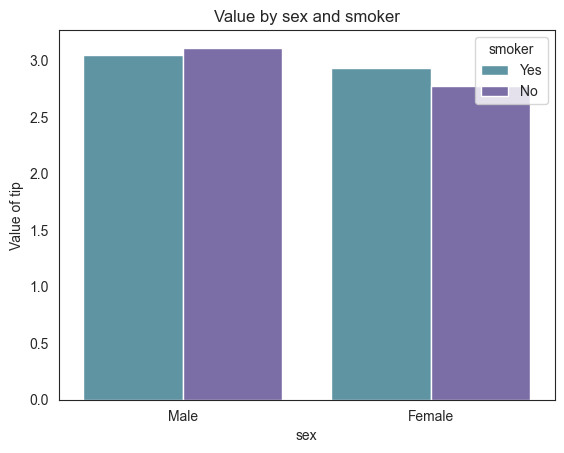

In [47]:
smoker_color = dict(Yes='#539caf', No='#7663b0')
sns.barplot(data, x="sex", y="tip", hue="smoker", errorbar=None, palette=smoker_color) 
plt.title('Value by sex and smoker')
plt.ylabel('Value of tip')

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [48]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Answer-1

In [49]:
import matplotlib.patches as mpatches

Text(0.5, 1.0, 'Proportion of survived and unsurvived by Pclass(1,2,3)')

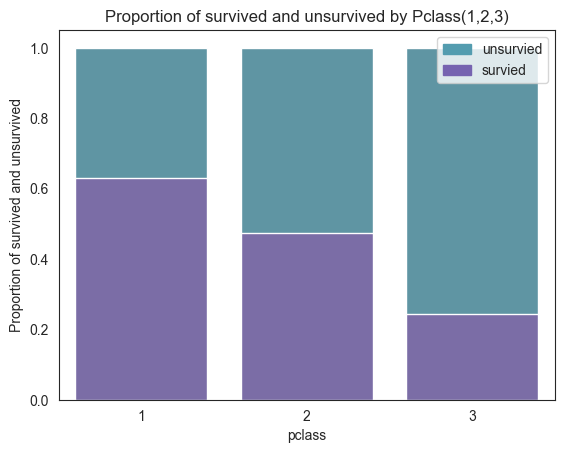

In [51]:
# 提取数据并计算每个仓位的总人数
ex_data_pclass = data[['pclass','survived']]
total_pclass_1 = int((ex_data_pclass[['pclass']]==1).sum().iloc[0])
total_pclass_2 = int((ex_data_pclass[['pclass']]==2).sum().iloc[0])
total_pclass_3 = int((ex_data_pclass[['pclass']]==3).sum().iloc[0])

# 将总人数，生还人数，死亡人数，以及它们的比例计算出来并添加的DataFrame中
df = ex_data_pclass.groupby(['pclass']).sum().reset_index()
df.loc[:,"total"] = [total_pclass_1, total_pclass_2, total_pclass_3]
df.loc[:,"unsurvived"] = df['total'].sub(df['survived'])
df.eval('survived_prop = survived / total', inplace=True)
df.eval('unsurvived_prop = 1 - survived_prop', inplace=True)
df.loc[:,"total_prop"]=[1, 1, 1]

# 画图
s1 = sns.barplot(df, x='pclass', y='total_prop', color='#539caf')
s2 = sns.barplot(df, x='pclass', y='survived_prop', color='#7663b0')

# 给图添加图例，标题和x，y轴标签
patch1 = mpatches.Patch(color='#539caf', label='unsurvied')
patch2 = mpatches.Patch(color='#7663b0', label='survied')
plt.legend(handles = [patch1, patch2], loc='best')
plt.ylabel('Proportion of survived and unsurvived')
plt.title('Proportion of survived and unsurvived by Pclass(1,2,3)')


#### Answer-2

Text(0.5, 1.0, 'Proportion of survived and unsurvived by Sex(male, female)')

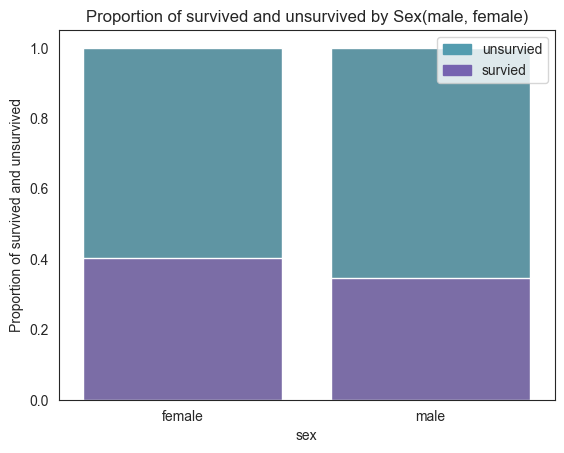

In [53]:
# 提取数据并计算男女各自的总人数
ex_data_sex = data[['sex','survived']]
total_male = int((ex_data_sex[['sex']]=='male').sum().iloc[0])
total_female = int((ex_data_sex[['sex']]=='female').sum().iloc[0])

# 将总人数，生还人数，死亡人数，以及它们的比例计算出来并添加的DataFrame中
df = ex_data_sex.groupby(['sex']).sum().reset_index()
df.loc[:,"total"] = [total_male, total_female]
df.loc[:,"unsurvived"] = df['total'].sub(df['survived'])
df.eval('survived_prop = survived / total', inplace=True)
df.eval('unsurvived_prop = 1 - survived_prop', inplace=True)
df.loc[:,"total_prop"]=[1, 1]

# 画图
s1 = sns.barplot(df, x='sex', y='total_prop', color='#539caf')
s2 = sns.barplot(df, x='sex', y='survived_prop', color='#7663b0')

# 给图添加图例，标题和x，y轴标签
patch1 = mpatches.Patch(color='#539caf', label='unsurvied')
patch2 = mpatches.Patch(color='#7663b0', label='survied')
plt.legend(handles = [patch1, patch2])
plt.ylabel('Proportion of survived and unsurvived')
plt.title('Proportion of survived and unsurvived by Sex(male, female)')

#### Answer-3

Text(0.5, 1.0, 'The box with 2 features for fare')

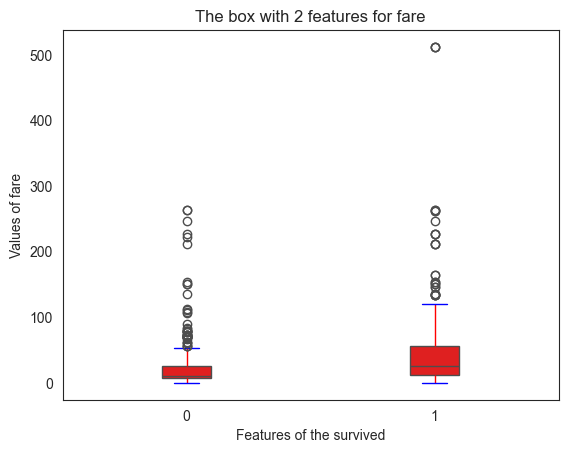

In [55]:
# 画图
sns.boxplot(data, x='survived', y='fare', 
            width=0.2, 
            patch_artist = True,
            color='r',
            capprops={'color': 'b'},
            whiskerprops={'color':'r'}
           )

# 添加文字说明
plt.xlabel('Features of the survived')
plt.ylabel('Values of fare')
plt.title('The box with 2 features for fare')

#### Answer-4

Text(0.5, 1.0, 'The box with 2 features for age')

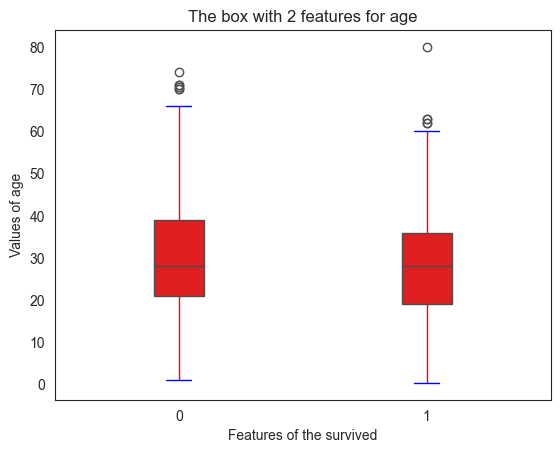

In [56]:
# 画图
sns.boxplot(data, x='survived', y='age', 
            width=0.2, 
            patch_artist = True,
            color='r',
            capprops={'color': 'b'},
            whiskerprops={'color':'r'}
           )

# 添加文字说明
plt.xlabel('Features of the survived')
plt.ylabel('Values of age')
plt.title('The box with 2 features for age')

#### Answer-5

Text(0.5, 1.0, 'Number of people for different kind of pclass by Embarked')

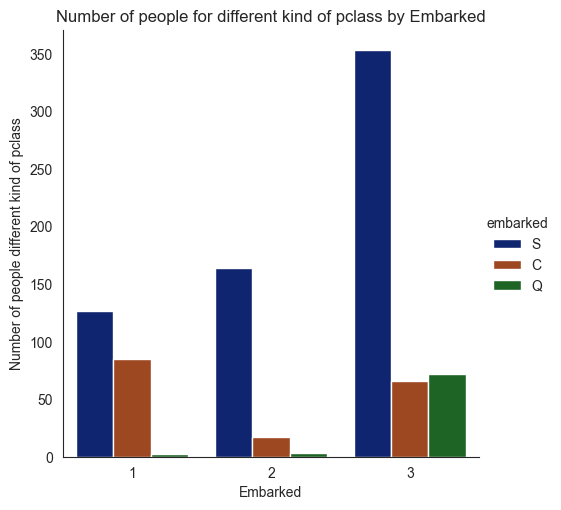

In [81]:
# 抽取数据并分别计算每个港口上船的乘客不同仓位等级的总数
df = data[['embarked', 'pclass']]

# S港口统计
num_S_1 = ((df['pclass']==1) & (df['embarked']=='S')).sum()
num_S_2 = ((df['pclass']==2) & (df['embarked']=='S')).sum()
num_S_3 = ((df['pclass']==3) & (df['embarked']=='S')).sum()
# C港口统计
num_C_1 = ((df['pclass']==1) & (df['embarked']=='C')).sum()
num_C_2 = ((df['pclass']==2) & (df['embarked']=='C')).sum()
num_C_3 = ((df['pclass']==3) & (df['embarked']=='C')).sum()
# Q港口统计
num_Q_1 = ((df['pclass']==1) & (df['embarked']=='Q')).sum()
num_Q_2 = ((df['pclass']==2) & (df['embarked']=='Q')).sum()
num_Q_3 = ((df['pclass']==3) & (df['embarked']=='Q')).sum()

# 构造数据表格
df_final = pd.DataFrame({
    'pclass': ([1] * 3) + ([2] * 3) + ([3] * 3),
    'embarked': ['S', 'C', 'Q'] * 3,
    'num': [num_S_1, num_C_1, num_Q_1,
            num_S_2, num_C_2, num_Q_2,
            num_S_3, num_C_3, num_Q_3]
})

# 绘图
sns.catplot(data=df_final, kind='bar', x='pclass', y='num', hue='embarked', palette='dark')

plt.xlabel('Embarked')
plt.ylabel('Number of people different kind of pclass')
plt.title('Number of people for different kind of pclass by Embarked')

#### Answer-6

In [ ]:
sns.boxplot(data, x='survived', y='sibsp', width=0.2, color='r', linecolor='b')

#### Answer-7

<Axes: xlabel='survived', ylabel='parch'>

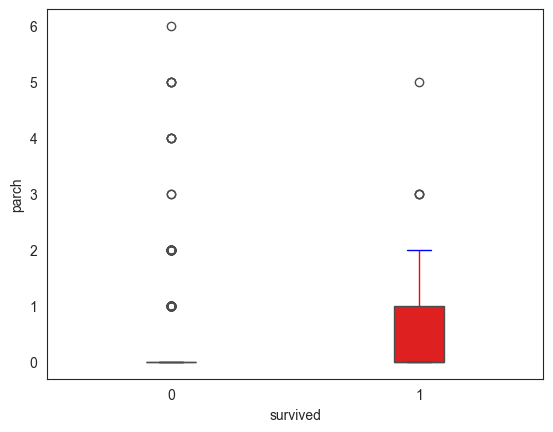

In [59]:
sns.boxplot(data, x='survived', y='parch', 
            width=0.2, 
            patch_artist = True,
            color='r',
            capprops={'color': 'b'},
            whiskerprops={'color':'r'}
           )

#### Answer-8

   alone  num  survived
0   True  163         1
1   True  374         0
2  False  179         1
3  False  175         0


Text(0.5, 1.0, 'The number of people by whether be survived or alone or not')

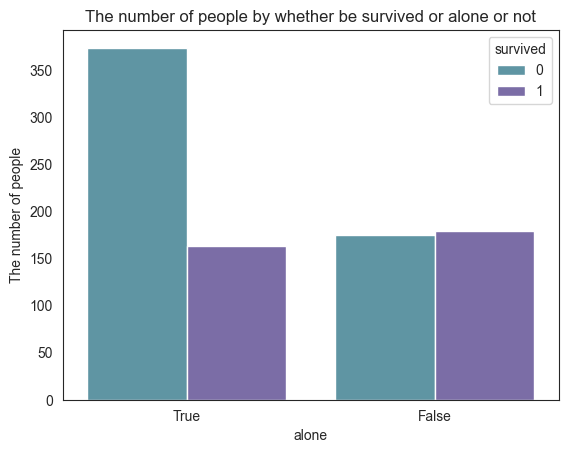

In [58]:
# 数据处理：
# 1.分别统计alone为False和True时对应幸存和遇难人数
df = data[['survived', 'alone']]
num_true_survived = ((df['alone'] == True) & (df['survived'] == 1)).sum()
num_true_unsurvived = ((df['alone'] == True) & (df['survived'] == 0)).sum()
num_false_survived = ((df['alone'] == False) & (df['survived'] == 1)).sum()
num_false_unsurvived = ((df['alone'] == False) & (df['survived'] == 0)).sum()

# 2.将计算的数据做成可直接绘图的DataFrame表格
temp_df = pd.DataFrame({
    'alone': ['True', 'True', 'False', 'False'],
    'num': [num_true_survived, num_true_unsurvived, num_false_survived, num_false_unsurvived],
    'survived': [1, 0, 1, 0]
})
print(temp_df)

# 画图
sns.barplot(temp_df, x='alone', y='num', hue='survived', palette=('#539caf', '#7663b0'))
plt.ylabel('The number of people')
plt.title('The number of people by whether be survived or alone or not')